# Preparar los datos para Machine Learning

In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/2008.csv",nrows=100000)

In [11]:
## Eliminamos los datos faltantes de las columnas que nos interesa
df = df[["ArrDelay","DepDelay","Distance","AirTime"]].dropna()

## Escalado

Algunos de los metodos de machine learning necesita que los datos estén escalados

In [12]:
x_scaled = preprocessing.scale(df)
x_scaled

array([[-0.63713243, -0.08247884,  0.40657043,  0.4452521 ],
       [-0.12045009,  0.3068154 ,  0.40657043,  0.38990966],
       [ 0.26706167, -0.08247884, -0.26709367, -0.29264705],
       ...,
       [ 1.84940134,  2.18250582,  0.53445243,  0.31611975],
       [ 0.17018373,  0.37759617,  0.53445243,  0.1869874 ],
       [ 0.17018373, -0.25943077,  0.53445243,  0.22388235]])

In [13]:
x_scaled.mean(axis=0)#Media de cada una de las columnas

array([2.47651119e-17, 1.07267490e-17, 1.19506063e-16, 1.01364179e-16])

In [14]:
x_scaled.std(axis=0)#Calcula desviacion estandar

array([1., 1., 1., 1.])

In [15]:
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [16]:
x_scaled[2]

array([ 0.26706167, -0.08247884, -0.26709367, -0.29264705])

### Otro Escalado

In [18]:
min_max_scaler = preprocessing.MinMaxScaler([0,10])
x_train_minmax = min_max_scaler.fit_transform(df)
x_train_minmax

array([[0.77199282, 0.92857143, 3.15557514, 2.91316527],
       [1.05924596, 1.125     , 3.15557514, 2.82913165],
       [1.27468582, 0.92857143, 1.85544293, 1.79271709],
       ...,
       [2.15439856, 2.07142857, 3.4023799 , 2.71708683],
       [1.22082585, 1.16071429, 3.4023799 , 2.5210084 ],
       [1.22082585, 0.83928571, 3.4023799 , 2.57703081]])

## Transformar una variable categorica en una variable dummies

In [20]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/2008.csv",nrows=100)
pd.get_dummies(df["Origin"])

,IAD,IND,ISP,JAN,JAX,LAS
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
95,0,0,0,0,0,1
96,0,0,0,0,0,1
97,0,0,0,0,0,1
98,0,0,0,0,0,1


# k-Means, el algoritmo de clustering

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/2008.csv",nrows=1e5)
newdf = df[["AirTime","DepDelay"]].dropna()

In [25]:
#newdf = df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [28]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(newdf)
kmeans.labels_

array([3, 3, 1, ..., 0, 3, 3])

In [30]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([ 3944, 60402,  8274, 26078], dtype=int64))

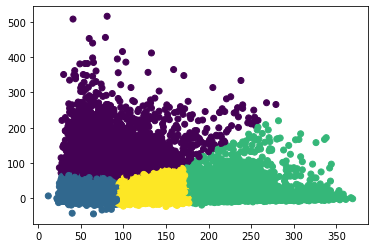

In [31]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c= kmeans.labels_)
plt.show()

In [32]:
kmeans.cluster_centers_

array([[ 79.50946731, 116.4478667 ],
       [ 58.86814825,   5.65975557],
       [224.74990908,  10.03576191],
       [128.07685235,   5.12600567]])

In [34]:
alldf = pd.read_csv("C:/Users/ordonez/Documents/UCASAL/notebooks/2008.csv",nrows=1e6)[["AirTime","DepDelay"]].dropna()

In [35]:
kmeans.predict(alldf)[0:50]

array([3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0])

## se ejecuta el método con mas variables

In [36]:
16*13

208